# Getting Data (API's, scraping, etc.)

In [7]:
from IPython.display import Image
Image(url='https://cdn.sanity.io/images/rzso0e8h/production/da8c3c8105c221ea003ea67057b5a75de819d36d-1920x1280.jpg?w=1920&h=1280&auto=format')

source: https://labor.org.mx/en/exhibitions/printing-out-the-internet

In [ ]:
https://christopherbaker.net/projects/murmur-study/

In [ ]:
https://twitter.com/everylotla

### Data sets

Need a collection of hugs and kisses, a huge collection of New York Times articles?  
https://academictorrents.com

Text corpora  
https://github.com/dariusk/corpora/tree/master/data

Data from around the world  
http://datacatalogs.org/

Machine learning datasets  
https://www.kaggle.com/datasets


### API's

#### Wikipedia

In [2]:
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11680 sha256=10223821d7337004b201098fa16cb8cc5a352cb12bb0f83e80191c42b3f52fd9
  Stored in directory: /Users/c/Library/Caches/pip/wheels/c2/46/f4/caa1bee71096d7b0cdca2f2a2af45cacf35c5760bee8f00948
Successfully built wikipedia


In [5]:
import wikipedia

'''
Install wikipedia first
pip install wikipedia

Check wikipedia API doc: 
https://wikipedia.readthedocs.io/en/latest/code.html#api
'''

# Search for something
print(wikipedia.search("wtf"))

# Get a summary of page 
print(wikipedia.summary("random"))

# Get a number of random topics
print(wikipedia.random(pages=2))

# Get a list of image urls of a page
print(wikipedia.page("random").images)

# Or just the first image
image_url = wikipedia.page("random").images[0]

from IPython.display import Image
Image(url=image_url)

['WTF', '.wtf', 'WTF?!', 'WTF with Marc Maron', 'UTF-8', 'List of WTF with Marc Maron episodes', 'Marc Maron', "Tabby's Star", 'Fuck', 'WTF! (film)']
In common usage, randomness is the apparent or actual lack of pattern or predictability in events. A random sequence of events, symbols or steps often has no order and does not follow an intelligible pattern or combination. Individual random events are, by definition, unpredictable, but if the probability distribution is known, the frequency of different outcomes over repeated events (or "trials") is predictable. For example, when throwing two dice, the outcome of any particular roll is unpredictable, but a sum of 7 will tend to occur twice as often as 4. In this view, randomness is not haphazardness; it is a measure of uncertainty of an outcome. Randomness applies to concepts of chance, probability, and information entropy.
The fields of mathematics, probability, and statistics use formal definitions of randomness. In statistics, a rando

https://en.wikipedia.org/wiki/Wikipedia:Getting_to_Philosophy

### Reddit API wrapper (PRAW)

In [8]:
!pip install praw

  Using cached praw-7.6.0-py3-none-any.whl (188 kB)
  Using cached update_checker-0.18.0-py3-none-any.whl (7.0 kB)
  Using cached prawcore-2.3.0-py3-none-any.whl (16 kB)


In [9]:
import praw

In [ ]:
print("INFO: Connecting to reddit...")

# For this api to work you need to first register an account 
# and fill in the data here

r = praw.Reddit(
    client_id="XWqof3jNyi70G1kOhxfVQg",
    client_secret="DmjiBIDvPDHf7vIMsVZDZC_LVJt_tw",
    user_agent="Zealousideal-Iron724",
)

if not r.read_only:

    raise Exception("ERROR: Can't connect to reddit")

else:

    print("INFO: Connected")
    
for submission in reddit.subreddit("worldnews").hot(limit=10):
    
    print(submission.title)

### Youtube downloader (YT-DLP)

In [55]:
!pip install yt-dlp

  Using cached yt_dlp-2022.10.4-py2.py3-none-any.whl (2.7 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.5 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 6.6 MB/s eta 0:00:00
  Using cached Brotli-1.0.9-cp39-cp39-macosx_10_9_x86_64.whl (421 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 6.7 MB/s eta 0:00:00


In [53]:
!mkdir yt_vids

In [69]:
import yt_dlp

downloads = 'yt_vids'

ydl_opts = {
    'outtmpl': downloads + '/%(id)s.%(ext)s',
    'quiet': False,
    'format_sort': ['res:1080', 'ext:mp4:m4a'],
    'ignoreerrors': False
}

URL = 'https://www.youtube.com/watch?v=ysU9hh4pBjc'

with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    
    info = ydl.extract_info(URL, download=False)
    
    if info:
        width = info.get('width')
        height = info.get('height')
        duration = info.get('duration')
        title = info.get('title')
        id = info.get('id')
        
    
    print("width: {}, height: {}, duration: {}, title: {}, id: {}".format(width, height, duration, title, id))
    ydl.download(URL)   

[youtube] ysU9hh4pBjc: Downloading webpage
[youtube] ysU9hh4pBjc: Downloading android player API JSON
width: 640, height: 480, duration: 3, title: 360 Rotation of a Scorpion, id: ysU9hh4pBjc
[youtube] ysU9hh4pBjc: Downloading webpage
[youtube] ysU9hh4pBjc: Downloading android player API JSON
[info] ysU9hh4pBjc: Downloading 1 format(s): 135+140
[download] yt_vids/ysU9hh4pBjc.mp4 has already been downloaded


In [60]:
print(id)

ysU9hh4pBjc


In [61]:
from IPython.display import Video

Video("yt_vids/{}.mp4".format(id))  

You can find some documentation here: https://github.com/yt-dlp/yt-dlp#embedding-yt-dlp

### Downloading unsecured IP cameras

In [ ]:
http://insecam.org/en/view/921591/

In [10]:
!pip install ffmpeg-python

  Using cached ffmpeg_python-0.2.0-py3-none-any.whl (25 kB)
  Using cached future-0.18.2-py3-none-any.whl


In [44]:
import ffmpeg 
import os
import time

In [45]:
cam_urls = [
    "http://128.101.85.194/mjpg/video.mjpg",
    "http://96.91.239.26:1024/mjpg/video.mjpg",
    "http://84.82.29.229:8080/mjpg/video.mjpg"
]

In [51]:
def download_from_ip(url, dir, idx):

    out_path = os.path.join(dir, "stream_{:03d}".format(idx))
    
    process = (
        ffmpeg
        .input(url)
        .output('{}.mkv'.format(out_path), codec="copy")
        .overwrite_output()
        .run_async(pipe_stdout=True)
    )
    
    print("starting capture")
    time.sleep(10)
    print("ending capture")
    process.stdout.close()
    process.kill()
        

In [52]:
out_dir = "insecam_streams"

if not os.path.exists(out_dir):
    
    os.makedirs(out_dir)

for idx, url in enumerate(cam_urls):

    download_from_ip(url, out_dir, idx)

starting capture


ffmpeg version 5.0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with Apple clang version 13.0.0 (clang-1300.0.29.30)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/5.0.1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --disable-libjack --disable-indev=jack --enable-videotoolbox
 

ending capture
starting capture


ffmpeg version 5.0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with Apple clang version 13.0.0 (clang-1300.0.29.30)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/5.0.1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --disable-libjack --disable-indev=jack --enable-videotoolbox
 

ending capture
starting capture


ffmpeg version 5.0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with Apple clang version 13.0.0 (clang-1300.0.29.30)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/5.0.1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --disable-libjack --disable-indev=jack --enable-videotoolbox
 

ending capture


### Download livstreams with streamlink

In [62]:
!pip install streamlink

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 351.1/351.1 kB 5.9 MB/s eta 0:00:00a 0:00:01
  Using cached lxml-4.9.1-cp39-cp39-macosx_10_15_x86_64.whl (4.6 MB)
  Using cached isodate-0.6.1-py2.py3-none-any.whl (41 kB)
  Using cached pycryptodome-3.15.0-cp35-abi3-macosx_10_9_x86_64.whl (1.6 MB)
  Using cached pycountry-22.3.5-py2.py3-none-any.whl
  Using cached PySocks-1.7.1-py3-none-any.whl (16 kB)


In [68]:
import streamlink

url = "https://www.bloomberg.com/live/europe"

out_dir = "streamlink"

if not os.path.exists(out_dir):
    
    os.makedirs(out_dir)

try:
    
    stream_url = streamlink.streams(url)['best'].url
    
except:
    
    print("couldn't find stream at {}".format(url))

print("found stream at {}".format(stream_url))

streamer = url.split("/")[-1]

out_path = os.path.join(out_dir, streamer)

process = (
    ffmpeg
    .input(stream_url)
    .output('{}.mkv'.format(out_path), codec="copy")
    .overwrite_output()
    .run_async(pipe_stdout=True)
)

print("starting capture")
time.sleep(10)
print("ending capture")
process.stdout.close()
process.kill()

Could not find JSON data. Invalid URL or bot protection...


couldn't find stream at https://www.bloomberg.com/live/europe
found stream at https://d4xunn272arip.cloudfront.net/hls/c9n_360.m3u8
starting capture


ffmpeg version 5.0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with Apple clang version 13.0.0 (clang-1300.0.29.30)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/5.0.1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --disable-libjack --disable-indev=jack --enable-videotoolbox
 

ending capture


You can check all streamlink plugins here: https://streamlink.github.io/plugins.html#plugins

In [38]:
!pip install opencv-python

  Using cached opencv_python-4.6.0.66-cp36-abi3-macosx_10_15_x86_64.whl (46.4 MB)


In [75]:
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 10.3 MB/s eta 0:00:0000:0100:01


In [76]:
import pandas as pd

In [77]:
pd.Series(['San Francisco', 'San Jose', 'Sacramento'])

0    San Francisco
1         San Jose
2       Sacramento
dtype: object

`DataFrame` objects can be created by passing a `dict` mapping `string` column names to their respective `Series`. If the `Series` don't match in length, missing values are filled with special [NA/NaN](http://pandas.pydata.org/pandas-docs/stable/missing_data.html) values. Example:

In [78]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])

pd.DataFrame({ 'City name': city_names, 'Population': population })

,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


In [82]:
!pip install opendatasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 2.9 MB/s eta 0:00:00


In [88]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/unsdsn/world-happiness")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  carl69


Your Kaggle Key:

  ········


100%|██████████████████████████████████████| 36.8k/36.8k [00:00<00:00, 1.86MB/s]

The example above used `DataFrame.describe` to show interesting statistics about a `DataFrame`. Another useful function is `DataFrame.head`, which displays the first few records of a `DataFrame`:

In [91]:
happy_dataframe = pd.read_csv("world-happiness/2015.csv", sep=",")
happy_dataframe.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [92]:
happy_dataframe.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Another powerful feature of *pandas* is graphing. For example, `DataFrame.hist` lets you quickly study the distribution of values in a column:

array([[<AxesSubplot: title={'center': 'Freedom'}>]], dtype=object)

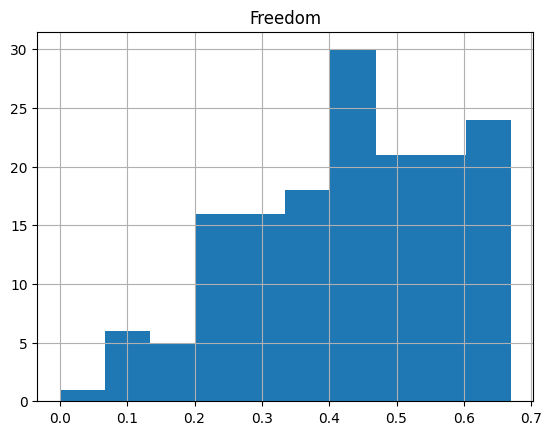

In [94]:
happy_dataframe.hist('Freedom')

#### PPRINT

In [1]:
import pprint

json_dict = {"hyperspace": {"constraints": [], "design": [["windFarm.windparkSize.k", "continuous", [0, 0, 5]], ["hydroPlant.primaryControlMax", "continuous", [100, 300]]], "kpis": ["frequency.y", "city.load.p[2]"]}, "lhc_size": 10, "number_of_runs": 10}

formatted_json_str = pprint.pformat(json_dict)
print(formatted_json_str)
pprint.pprint(json_dict)

{'hyperspace': {'constraints': [],
                'design': [['windFarm.windparkSize.k', 'continuous', [0, 0, 5]],
                           ['hydroPlant.primaryControlMax',
                            'continuous',
                            [100, 300]]],
                'kpis': ['frequency.y', 'city.load.p[2]']},
 'lhc_size': 10,
 'number_of_runs': 10}
{'hyperspace': {'constraints': [],
                'design': [['windFarm.windparkSize.k', 'continuous', [0, 0, 5]],
                           ['hydroPlant.primaryControlMax',
                            'continuous',
                            [100, 300]]],
                'kpis': ['frequency.y', 'city.load.p[2]']},
 'lhc_size': 10,
 'number_of_runs': 10}
